# CHECK ARAUS-EXTENDED features compared to ARAUS-ORIGINAL

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Set to Times New Roman
    'font.size': 16,  # Set a suitable font size
    'axes.labelsize': 15,
    'axes.titlesize': 17,
    'legend.fontsize': 13,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13
})

In [78]:
# import original ARAUS
# Read the csv file into a DataFrame
df_original = pd.read_csv("../../../data/responses_adapted.csv")
print(df_original.columns)
# Extract fold 0
df_original_0=df_original[df_original["fold_r"]==0]
print(df_original_0.info())
# 

Index(['participant', 'fold_r', 'soundscape', 'masker', 'smr',
       'stimulus_index', 'wav_gain', 'time_taken', 'is_attention', 'pleasant',
       ...
       'Leq_R_r', 'masker_bird', 'masker_construction', 'masker_silence',
       'masker_traffic', 'masker_water', 'masker_wind', 'P_ground_truth',
       'E_ground_truth', 'file'],
      dtype='object', length=170)
<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 10086 to 10325
Columns: 170 entries, participant to file
dtypes: float64(147), int64(19), object(4)
memory usage: 320.6+ KB
None


In [79]:
# import ARAUS-extended
# Read the csv file into a DataFrame
df_extended = pd.read_csv("../../../data/ARAUS_extended.csv")
print(df_extended.columns)
# Extract fold 0
df_extended_0=df_extended[df_extended["info.fold"]==0]
print(df_extended_0.info())

Index(['CLAP', 'info.file', 'info.participant', 'info.fold', 'info.soundscape',
       'info.masker', 'info.smr', 'info.stimulus_index', 'info.wav_gain',
       'info.time_taken',
       ...
       'freesound.sfx.temporal_spread.p80', 'freesound.sfx.logattacktime.avg',
       'freesound.sfx.logattacktime.var', 'freesound.sfx.logattacktime.p20',
       'freesound.sfx.logattacktime.p80', 'freesound.sfx.inharmonicity.avg',
       'freesound.sfx.inharmonicity.var', 'freesound.sfx.inharmonicity.p20',
       'freesound.sfx.inharmonicity.p80', 'freesound.rhythm.bpm'],
      dtype='object', length=285)
<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 239
Columns: 285 entries, CLAP to freesound.rhythm.bpm
dtypes: float64(261), int64(19), object(5)
memory usage: 536.2+ KB
None


In [80]:
# we are only interested in the features, therefore, maintain only the answers from one participant
df_original_0=df_original_0[df_original_0["participant"]=="ARAUS_10001"]
df_extended_0=df_extended_0[df_extended_0["info.participant"]=="ARAUS_10001"]

In [81]:
# Files of Fold-0
files=df_extended_0["info.file"].unique()
print(files)

['fold_0_participant_10001_stimulus_02.wav'
 'fold_0_participant_10001_stimulus_03.wav'
 'fold_0_participant_10001_stimulus_04.wav'
 'fold_0_participant_10001_stimulus_05.wav'
 'fold_0_participant_10001_stimulus_06.wav'
 'fold_0_participant_10001_stimulus_07.wav'
 'fold_0_participant_10001_stimulus_08.wav'
 'fold_0_participant_10001_stimulus_09.wav'
 'fold_0_participant_10001_stimulus_10.wav'
 'fold_0_participant_10001_stimulus_11.wav'
 'fold_0_participant_10001_stimulus_12.wav'
 'fold_0_participant_10001_stimulus_13.wav'
 'fold_0_participant_10001_stimulus_14.wav'
 'fold_0_participant_10001_stimulus_15.wav'
 'fold_0_participant_10001_stimulus_16.wav'
 'fold_0_participant_10001_stimulus_17.wav'
 'fold_0_participant_10001_stimulus_18.wav'
 'fold_0_participant_10001_stimulus_19.wav'
 'fold_0_participant_10001_stimulus_21.wav'
 'fold_0_participant_10001_stimulus_22.wav'
 'fold_0_participant_10001_stimulus_23.wav'
 'fold_0_participant_10001_stimulus_24.wav'
 'fold_0_participant_10001_stimu

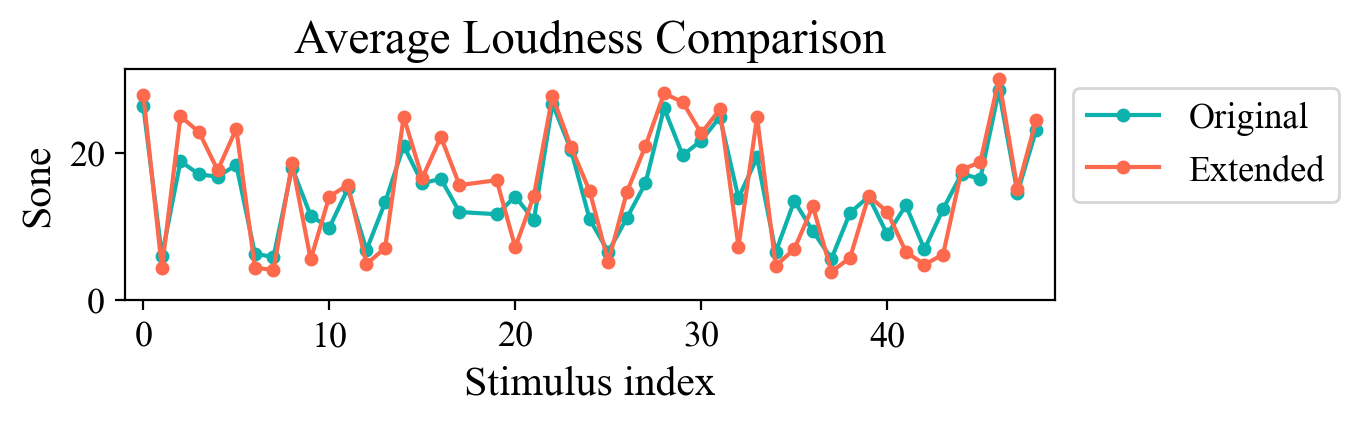

In [82]:
# AVERAGE LOUDNESS

# extract data
avg_loudness_extended=df_extended_0["ARAUS.loudness.avg"].values
avg_loudness_original=df_original_0["Navg_r"].values
stimulus=df_extended_0["info.stimulus_index"].values -2
# plot
# Plot each series with the specified colors
plt.figure(figsize=[6,1.5],dpi=200)
plt.plot(stimulus, avg_loudness_original, color='#0DB2AC', marker='o',markersize=4,label='Original')
plt.plot(stimulus, avg_loudness_extended, color='#FC694D', marker='o',markersize=4,label='Extended')
# Add labels and title
plt.xlabel('Stimulus index')
plt.ylabel('Sone')
plt.title('Average Loudness Comparison')
plt.ylim(bottom=0)
plt.xlim((-1,49))
# Show legend
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


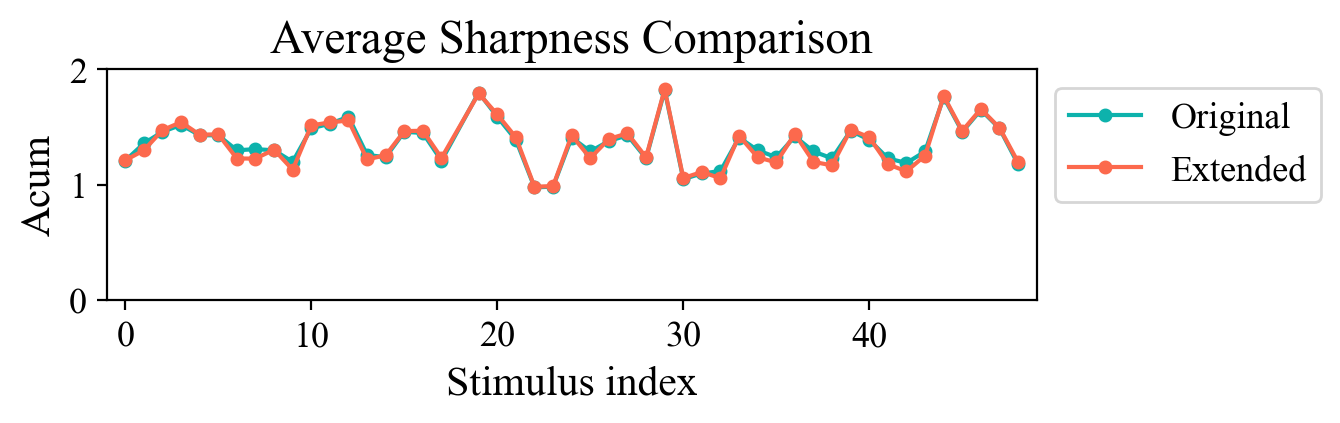

In [83]:
# AVERAGE SHARPNESS

# extract data
avg_sharpness_extended=df_extended_0["ARAUS.sharpness.avg"].values
avg_sharpness_original=df_original_0["Savg_r"].values
stimulus=df_extended_0["info.stimulus_index"].values-2
# plot
# Plot each series with the specified colors
plt.figure(figsize=[6,1.5],dpi=200)
plt.plot(stimulus, avg_sharpness_original, color='#0DB2AC', marker='o',markersize=4,label='Original')
plt.plot(stimulus, avg_sharpness_extended, color='#FC694D', marker='o',markersize=4,label='Extended')
# Add labels and title
plt.xlabel('Stimulus index')
plt.ylabel('Acum')
plt.title('Average Sharpness Comparison')
# Show legend
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
plt.ylim(top=2)
plt.xlim((-1,49))
# Show the plot
plt.show()

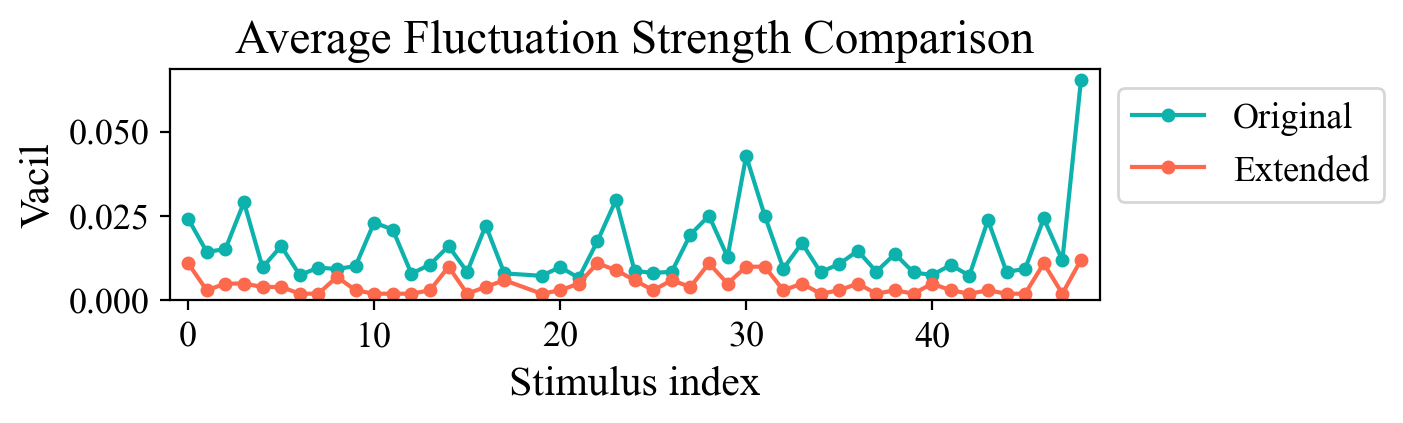

In [89]:
# AVERAGE Fluctuation Strength

# extract data
avg_fluctuation_extended=df_extended_0["ARAUS.fluctuation.avg"].values
avg_fluctuation_original=df_original_0["Favg_r"].values
stimulus=df_extended_0["info.stimulus_index"].values-2
# plot
# Plot each series with the specified colors
plt.figure(figsize=[6,1.5],dpi=200)
plt.plot(stimulus, avg_fluctuation_original, color='#0DB2AC', marker='o',markersize=4,label='Original')
plt.plot(stimulus, avg_fluctuation_extended*10, color='#FC694D', marker='o',markersize=4,label='Extended')
# Add labels and title
plt.xlabel('Stimulus index')
plt.ylabel('Vacil')
plt.title('Average Fluctuation Strength Comparison')
# Show legend
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
plt.xlim((-1,49))
# Show the plot
plt.show()

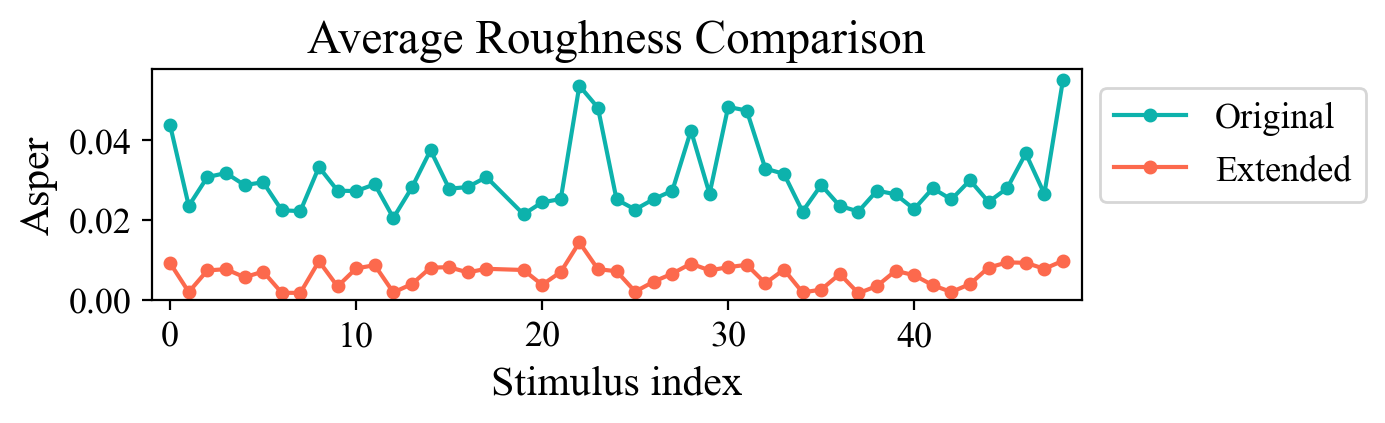

In [85]:
# AVERAGE Roughness

# extract data
avg_roughness_extended=df_extended_0["ARAUS.roughness.avg"].values
avg_roughness_original=df_original_0["Ravg_r"].values
stimulus=df_extended_0["info.stimulus_index"].values-2
# plot
# Plot each series with the specified colors
plt.figure(figsize=[6,1.5],dpi=200)
plt.plot(stimulus, avg_roughness_original, color='#0DB2AC', marker='o',markersize=4,label='Original')
plt.plot(stimulus, avg_roughness_extended, color='#FC694D', marker='o',markersize=4,label='Extended')
# Add labels and title
plt.xlabel('Stimulus index')
plt.ylabel('Asper')
plt.title('Average Roughness Comparison')
# Show legend
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
plt.xlim((-1,49))
# Show the plot
plt.show()

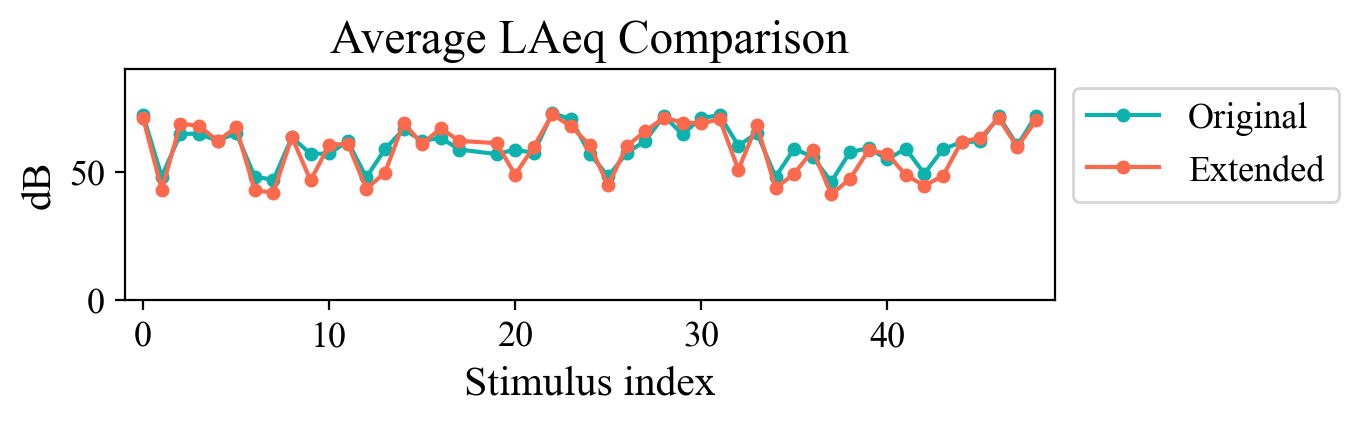

In [86]:
# AVERAGE LAeq

# extract data
avg_LA_extended=df_extended_0["ARAUS.LA.avg"].values
avg_LA_original=df_original_0["LAavg_r"].values
stimulus=df_extended_0["info.stimulus_index"].values-2
# plot
# Plot each series with the specified colors
plt.figure(figsize=[6,1.5],dpi=200)
plt.plot(stimulus, avg_LA_original, color='#0DB2AC', marker='o',markersize=4,label='Original')
plt.plot(stimulus, avg_LA_extended, color='#FC694D', marker='o',markersize=4,label='Extended')
# Add labels and title
plt.xlabel('Stimulus index')
plt.ylabel('dB')
plt.title('Average LAeq Comparison')
# Show legend
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
plt.ylim(top=90)
plt.xlim((-1,49))
# Show the plot
plt.show()

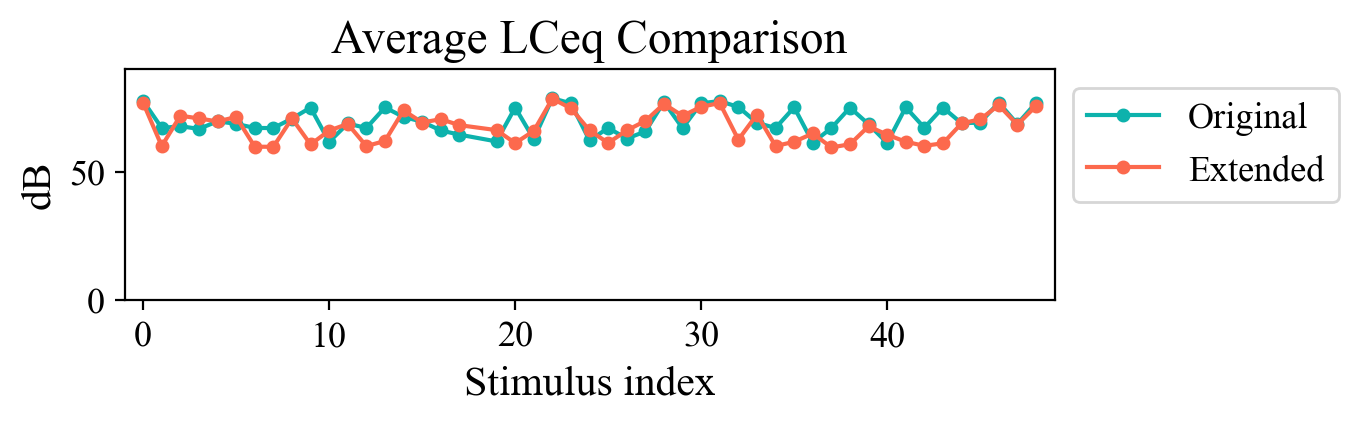

In [87]:
# AVERAGE LCeq

# extract data
avg_LC_extended=df_extended_0["ARAUS.LC.avg"].values
avg_LC_original=df_original_0["LCavg_r"].values
stimulus=df_extended_0["info.stimulus_index"].values-2
# plot
# Plot each series with the specified colors
plt.figure(figsize=[6,1.5],dpi=200)
plt.plot(stimulus, avg_LC_original, color='#0DB2AC', marker='o',markersize=4,label='Original')
plt.plot(stimulus, avg_LC_extended, color='#FC694D', marker='o',markersize=4,label='Extended')
# Add labels and title
plt.xlabel('Stimulus index')
plt.ylabel('dB')
plt.title('Average LCeq Comparison')
# Show legend
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
plt.ylim(top=90)
plt.xlim((-1,49))
# Show the plot
plt.show()

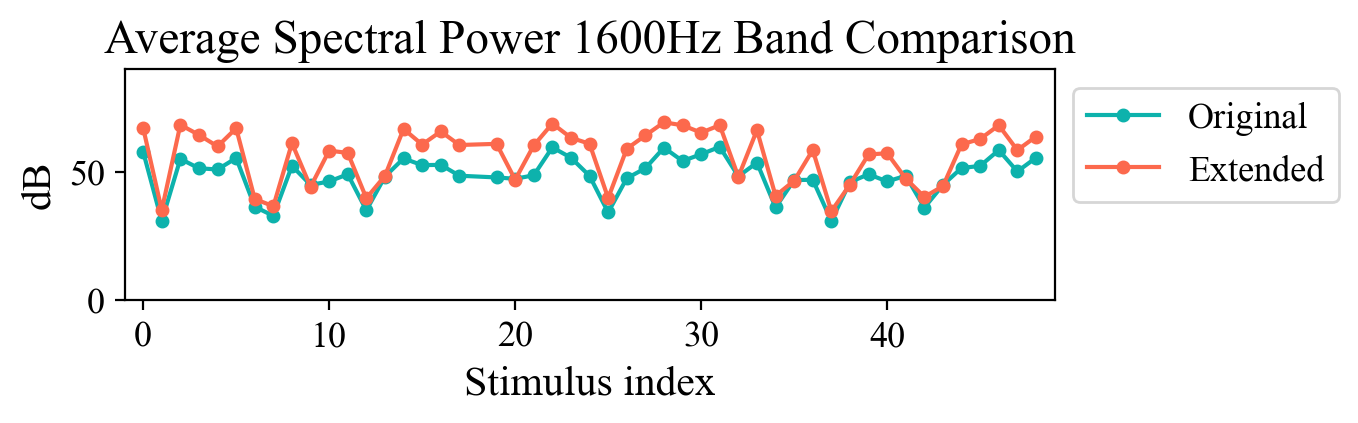

In [88]:
# AVERAGE M_1600 power

# extract data
avg_M_extended=df_extended_0["ARAUS.energy_frequency.01600_0"].values
avg_M_original=df_original_0["M01600_0_r"].values
stimulus=df_extended_0["info.stimulus_index"].values-2
# plot
# Plot each series with the specified colors
plt.figure(figsize=[6,1.5],dpi=200)
plt.plot(stimulus, avg_M_original, color='#0DB2AC', marker='o',markersize=4,label='Original')
plt.plot(stimulus, avg_M_extended, color='#FC694D', marker='o',markersize=4,label='Extended')
# Add labels and title
plt.xlabel('Stimulus index')
plt.ylabel('dB')
plt.title('Average Spectral Power 1600Hz Band Comparison')
# Show legend
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
plt.ylim(top=90)
plt.xlim((-1,49))
# Show the plot
plt.show()